Aplicações Web 
=============

As aplicações web são completamente ubíqüas, sendo utilizadas para internet banking, e-mail, tocadores de músicas e vídeo, controle remote para dosamento de ração de animais, tomadas/câmeras de segurança/porteiro eletrônico inteligentes que vão permitir que hackers te espionem e sabotem remotamente, dentre outras aplicações legítimas e esdrúxulas.

Protocolo e requisição de objetos
------------------------------------------------

O que todas as aplicações tem em comum é o uso do protocolo de aplicação [HTTP](https://www.ietf.org/rfc/rfc2616.html), que na prática age como um protocolo de transporte de mais alto nível que o [TCP](https://www.ietf.org/rfc/rfc9293.html) ou o [QUIC](https://www.rfc-editor.org/rfc/rfc9000.html), acessados via [sockets](/02_programacao_com_sockets.ipynb) que fazem interface com o sistema operacional.

Se abrirmos o menu de inspeção de um navegador web, podemos ver o corpo de um documento HTTP.
Via script python, também podemos obter o mesmo conteúdo através da biblioteca requests, ou outra similar.

In [1]:
import requests

dados = requests.get("https://gnu.org")
print(dados.text[:500])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="content-type" content="text/html; charset=utf-8" />
<link rel="author" href="mailto:webmasters@gnu.org" />
<link rel="icon" type="image/png" href="/graphics/gnu-head-mini.png" />
<meta name="ICBM" content="42.355469,-71.058627" />
<link rel="stylesheet" type="text/css" href="/layout.min.css" media="screen" />
<link rel="stylesheet" type="text/css" href="/print.min.css" media="print" />





Para saber como o endereço URL se torna em um IP que é então roteado para levar o pacote até o servidor de destino, olhe a [seção de DNS](/01_aplicacao_dns.ipynb).

Note que o corpo do documento contém referências a outros documentos (`gnu-head-mini.png`, `layout.min.css`, `print.min.css`).
Estes são baixados em seguida pelo navegador, repetindo o mesmo procedimento.

In [2]:
dados = requests.get("https://gnu.org/graphics/gnu-head-mini.png")
print(dados.content[:300])

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x06\x00\x00\x00szz\xf4\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\tpHYs\x00\x00\x00\xc4\x00\x00\x00\xc4\x01\xcf\x8aXL\x00\x00\x00\x07tIME\x07\xe3\x05\x06\x0e6!~d\xbf\x01\x00\x00\x069IDATX\xc3\xc5\x97mHT\xdb\x17\xc6\x7f\xe3\xf8\xc6\x14\x8e\xa4\x91\x1aH\xa4\xa0IT\x98B\x81\xf4\x8e\x14E\x94\x12*\xf6%\x89\xc8\x92\xb2\xc2\n\xc2\x92H{#\x15E\x04\t\x05sH\x94P\tE(\x8aDD\xc6J\xcb"\x8ca\x08\x91\xc9Q\xa7\x98\xec\xe4(\xceY\xff\x0f\x9799\xce\\\xf3r\xffp\x1f\x98\x0fg\xed\xbd\xcfz\xf6\x9a\xf5\xac\xb5\x8eND\x84\xff\x10\x81\xfe\x8cUUU\x04\x04\x04\xa0\xaa*\xaa\xaa2;;\x8b\xa2(\x14\x17\x17\x13\x14\x14\xb4\xac\x17wuua\xb1X0\x1a\x8d\xcc\xcc\xcc\xb0z\xf5j233}\xf6\xe9\x16F\xc0d2\xe1p8\x18\x1a\x1a\xa2\xa1\xa1\x01\x80\xb0\xb00~\xfc\xf8\xc1\xa5K\x97\x88\x8d\x8dejj\x8a\xec\xecl\x92\x92\x92\xfc:'


O conteúdo acima é uma imagem. Portanto, se quisermos exibí-la precisamos decodificá-la.

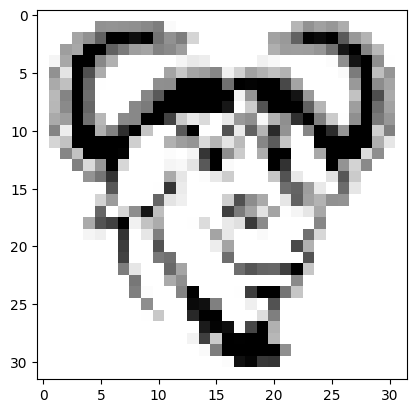

In [3]:
from PIL import Image
import io
import matplotlib.pyplot as plt
image = Image.open(io.BytesIO(dados.content))
plt.imshow(image)

Baixando o próximo arquivo

In [4]:
dados = requests.get("https://gnu.org/layout.min.css")
print(dados.text[:500])

html,body{font-size:1em;text-align:left;text-decoration:none;color:#222}html{background:#e4e4e4}body{max-width:74.92em;padding:0;margin:0 auto;background:white;border:.1em solid #bbb;border-top:0;-moz-box-shadow:0 0 5px 5px #bbb;-webkit-box-shadow:0 0 5px 5px #bbb;-icab-box-shadow:0 0 5px 5px #bbb;-o-box-shadow:0 0 5px 5px #bbb;box-shadow:0 0 5px 5px #bbb}div{padding:0;margin:0}.inner{overflow:hidden}#top{border-top:3px solid #a32d2a}.skip,#fsf-frame{position:fixed;top:-1000px}#header{text-align


Tudo funcionando corretamente até então. Mas estamos assumindo que isto é verdade.
Do ponto de vista de um programador, esse é um erro grotesco.
Devemos checar se nossa requisição foi atendida corretamente.

Códigos de retorno
----------------------------

Para fazer isto, o HTTP insere códigos de retorno indicando operação bem sucedida, ou mal sucedida, além da sua causa (se programado corretamente...).

Uma lista de códigos disponíveis pode ser acessada no [manual](https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status) da Mozilla Foundation.

Vamos testar para alguns arquivos. 

O primeiro será um existente.

In [5]:
dados = requests.get("https://gnu.org/print.min.css")
print(dados)

<Response [200]>


Para descobrirmos que raios este código significa, podemos utilizar outra biblioteca.

In [6]:
import http.client
print(http.client.responses[dados.status_code])

OK


Agora tentaremos com um arquivo inexistente.

In [7]:
dados = requests.get("https://gnu.org/nao_existe_a_menor_chance_deste_arquivo_existir.txt")
print(dados.status_code)
print(http.client.responses[dados.status_code])

404
Not Found


Pronto. Com isso já se pode ter uma idéia de como funcionam estas requisições de objetos via HTTP.

Mas como exatamente são preenchidas estas requisições?

Formato das requisições
-----------------------------------

Podemos visualizar as requisições feitas pela biblioteca `requests` assim como enviado para a camada de transporte do sistema operacional. Para isso, faremos um gato com o truque de [monkey-patching](https://en.wikipedia.org/wiki/Monkey_patch) do [StackOverflow](https://stackoverflow.com/a/20660170)

In [8]:
printOnce = []
def patch_send():
    old_send= http.client.HTTPConnection.send
    def new_send( self, data ):
        global printOnce
        if data not in printOnce:
            print (data)
            printOnce.append(data)
        return old_send(self, data)
    http.client.HTTPConnection.send= new_send

patch_send()
dados = requests.get("https://gnu.org/nao_existe_a_menor_chance_deste_arquivo_existir.txt")

b'GET /nao_existe_a_menor_chance_deste_arquivo_existir.txt HTTP/1.1\r\nHost: gnu.org\r\nUser-Agent: python-requests/2.28.2\r\nAccept-Encoding: gzip, deflate, br\r\nAccept: */*\r\nConnection: keep-alive\r\n\r\n'
b'GET /nao_existe_a_menor_chance_deste_arquivo_existir.txt HTTP/1.1\r\nHost: www.gnu.org\r\nUser-Agent: python-requests/2.28.2\r\nAccept-Encoding: gzip, deflate, br\r\nAccept: */*\r\nConnection: keep-alive\r\n\r\n'


Como podemos observar, temos nossa requisição (`GET`) HTTP buscando o caminho do arquivo inexistente no servidor.

As múltiplas impressões são devido as múltiplas tentantivas de se tentar baixar o arquivo inexistente, caso o servidor tivesse retornado um código de erro incorreto.

Também podemos utilizar outros métodos, como o método `POST`, para envio de dados. Vejamos a diferença do conteúdo da requisição.

In [9]:
dados = requests.post("https://gnu.org/nao_existe_a_menor_chance_deste_arquivo_existir.txt", json={"hot":"potato"})

b'POST /nao_existe_a_menor_chance_deste_arquivo_existir.txt HTTP/1.1\r\nHost: gnu.org\r\nUser-Agent: python-requests/2.28.2\r\nAccept-Encoding: gzip, deflate, br\r\nAccept: */*\r\nConnection: keep-alive\r\nContent-Length: 17\r\nContent-Type: application/json\r\n\r\n'
b'{"hot": "potato"}'


Como podemos observar, o tipo de conteúdo do objeto foi modificado para application/json, e o comprimento do conteúdo é de 17 bytes (`{"hot": "potato"}`).

Escrevendo uma aplicação web
---------------------------------------------

Implementar um servidor web é trabalho para poucos. Muitos detalhes, muita chance de fazer alguma besteira e acabar expondo seu servidor e dados privados. Existem diversas opções disponíveis, incluindo os famosos: [Apache httpd](https://httpd.apache.org/), o [lighthttpd](https://www.lighttpd.net/) e [NGINX](https://nginx.org/en/).

Também existem diversos frameworks para desenvolvimento de sites que oferecem seus próprios servidores.
Meu favorito é o [Flask](https://flask.palletsprojects.com/en/2.2.x/), para Python.

Vamos implementar um servidor para fazer uma demonstração.

In [12]:
from flask import Flask, request
from multiprocessing import Process
import time 

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"


if __name__ == "__main__":
    # Inicia servidor Web em um outro processo escutando na porta 5000
    server = Process(target=app.run, kwargs={"port":5000})
    server.start()
    
    # Dá alguns segundos para o servidor ser iniciado
    time.sleep(2)
    
    # Requisita caminho '/' do servidor local '127.0.0.1' na porta '5000'
    # Porta padrão sem criptografia é a 80
    # Porta padrão com criptografia é a 443
    dados = requests.get("http://127.0.0.1:5000/", verify=False) # não usar criptografia ou https
    print(dados.text)
    
    # Desliga servidor e mata processo filho
    server.terminate()
    server.join()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Apr/2023 01:40:43] "GET / HTTP/1.1" 200 -


<p>Hello, World!</p>


Como podemos ver, nosso servidor funciona. Bacana. E o que podemos fazer com ele? Endpoints de API. Vejamos um exemplo.

In [17]:
import json

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"

usuarios = {}

@app.route('/usuario/')
@app.route("/usuario/<email>", methods=["GET", "POST"])
def usuario(email=None):
    global usuarios
    if request.method == 'GET':
        if email is None:
            return json.dumps(usuarios)
        else:
            if email in usuarios:
                return json.dumps({email:usuarios[email]})
            else:
                return json.dumps({}), 404 # Not Found
    else: # POST
        if email is None:
            return json.dump({}), 400 # Bad request
        else:
            if email in usuarios:
                return json.dumps({}), 409 # Conflict
            else:
                usuarios[email] = True
                return json.dumps({}), 200 # OK
                

    

if __name__ == "__main__":
    porta = 5001
    # Inicia servidor Web em um outro processo escutando na porta 5000
    server = Process(target=app.run, kwargs={"port":porta})
    server.start()
    
    # Dá alguns segundos para o servidor ser iniciado
    time.sleep(2)
    
    # Checa todos os usuários existentes
    dados = requests.get(f"http://127.0.0.1:{porta}/usuario/", verify=False)
    print(dados) # Deve retornar 200
    print(dados.text)
    
    print("="*50)
    # Checa o usuário banana@gmail.com
    dados = requests.get(f"http://127.0.0.1:{porta}/usuario/banana@gmail.com", verify=False)
    print(dados) # Deve retornar 404
    print(dados.text)
    
    print("="*50)
    # Cria o usuário banana@gmail.com
    dados = requests.post(f"http://127.0.0.1:{porta}/usuario/banana@gmail.com", verify=False)
    print(dados) # Deve retornar 200
    
    print("="*50)
    # Checa todos os usuários existentes
    dados = requests.get(f"http://127.0.0.1:{porta}/usuario/", verify=False)
    print(dados) # Deve retornar 200
    print(dados.text)
    
    print("="*50)
    # Tenta sobrescrever o usuário banana@gmail.com
    dados = requests.post(f"http://127.0.0.1:{porta}/usuario/banana@gmail.com", verify=False)
    print(dados) # Deve retornar 409
    
    
    # Desliga servidor e mata processo filho
    server.terminate()
    server.join()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [22/Apr/2023 01:44:44] "GET /usuario/ HTTP/1.1" 200 -
127.0.0.1 - - [22/Apr/2023 01:44:44] "GET /usuario/banana@gmail.com HTTP/1.1" 404 -
127.0.0.1 - - [22/Apr/2023 01:44:44] "POST /usuario/banana@gmail.com HTTP/1.1" 200 -
127.0.0.1 - - [22/Apr/2023 01:44:44] "GET /usuario/ HTTP/1.1" 200 -
127.0.0.1 - - [22/Apr/2023 01:44:44] "POST /usuario/banana@gmail.com HTTP/1.1" 409 -


<Response [200]>
{}
<Response [404]>
{}
<Response [200]>
<Response [200]>
{"banana@gmail.com": true}
<Response [409]>
